In [3]:
import time
start_time = time.time()

<font color = 'Blue'> 
Name: Shin Le


## Analyzing Customer Behavior to Predict Churn: A Subscription Service Case Study

Dataset:
https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset?select=train.csv


<a id="0"></a> <br>
<font color = 'Blue'> 
# Table of Contents

1. [About Dataset](#1)
1. [Importing Libraries](#2)
1. [Functions Implementation](#3)
1. [Loading Data](#4)
1. [Data Preprocessing](#5)
   1. [Outlier](#51)
   1. [Dummy Variables](#52)
   1. [Labeling Encoding](#53)
1. [Exploratory Data Analysis](#6)
1. [Fitting the Models](#7)
   1. [Data Splitting](#71)
   1. [Fitting the *Full Model* with *Logistic Regression*](#72)
   1. [Machine Learning Model Evaluations and Predictions](#73)
      1. [Using Sequential Feature Selection for the *Logistic Regression*](#731)
      1. [*Decision Tree*](#732)
      1. [*A Pruned Tree*](#733)
      1. [Ensemble Method: *Random Forest Classifier*](#734)
      1. [Ensemble Method: *Gradient Boosting Classifier*](#735)
      1. [*Support Vector Machine* (SVM)](#736)
      1. [*Neural Network*](#737)
      1. [Model Comparison](#738)




<a id="1"></a>
## <h3 style="color: red;"><b>1. About Dataset</b></h3>


### **Context**:
This dataset is part of a data science project focused on customer churn prediction for a subscription-based service. Customer churn, the rate at which customers cancel their subscriptions, is a vital metric for businesses offering subscription services. Predictive analytics techniques are employed to anticipate which customers are likely to churn, enabling companies to take proactive measures for customer retention.

### **Content**:
This dataset contains anonymized information about customer subscriptions and their interaction with the service. The data includes various features such as subscription type, payment method, viewing preferences, customer support interactions, and other relevant attributes. It consists of three files such as "test.csv", "train.csv", "data_descriptions.csv".

### **Columns**:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Column_name</th>
      <th>Column_type</th>
      <th>Data_type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>AccountAge</td>
      <td>Feature</td>
      <td>integer</td>
      <td>The age of the user's account in months.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>MonthlyCharges</td>
      <td>Feature</td>
      <td>float</td>
      <td>The amount charged to the user on a monthly basis.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>TotalCharges</td>
      <td>Feature</td>
      <td>float</td>
      <td>The total charges incurred by the user over the account's lifetime.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>SubscriptionType</td>
      <td>Feature</td>
      <td>object</td>
      <td>The type of subscription chosen by the user (Basic, Standard, or Premium).</td>
    </tr>
    <tr>
      <th>4</th>
      <td>PaymentMethod</td>
      <td>Feature</td>
      <td>string</td>
      <td>The method of payment used by the user.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>PaperlessBilling</td>
      <td>Feature</td>
      <td>string</td>
      <td>Indicates whether the user has opted for paperless billing (Yes or No).</td>
    </tr>
    <tr>
      <th>6</th>
      <td>ContentType</td>
      <td>Feature</td>
      <td>string</td>
      <td>The type of content preferred by the user (Movies, TV Shows, or Both).</td>
    </tr>
    <tr>
      <th>7</th>
      <td>MultiDeviceAccess</td>
      <td>Feature</td>
      <td>string</td>
      <td>Indicates whether the user has access to the service on multiple devices (Yes or No).</td>
    </tr>
    <tr>
      <th>8</th>
      <td>DeviceRegistered</td>
      <td>Feature</td>
      <td>string</td>
      <td>The type of device registered by the user (TV, Mobile, Tablet, or Computer).</td>
    </tr>
    <tr>
      <th>9</th>
      <td>ViewingHoursPerWeek</td>
      <td>Feature</td>
      <td>float</td>
      <td>The number of hours the user spends watching content per week.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>AverageViewingDuration</td>
      <td>Feature</td>
      <td>float</td>
      <td>The average duration of each viewing session in minutes.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>ContentDownloadsPerMonth</td>
      <td>Feature</td>
      <td>integer</td>
      <td>The number of content downloads by the user per month.</td>
    </tr>
    <tr>
      <th>12</th>
      <td>GenrePreference</td>
      <td>Feature</td>
      <td>string</td>
      <td>The preferred genre of content chosen by the user.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>UserRating</td>
      <td>Feature</td>
      <td>float</td>
      <td>The user's rating for the service on a scale of 1 to 5.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>SupportTicketsPerMonth</td>
      <td>Feature</td>
      <td>integer</td>
      <td>The number of support tickets raised by the user per month.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Gender</td>
      <td>Feature</td>
      <td>string</td>
      <td>The gender of the user (Male or Female).</td>
    </tr>
    <tr>
      <th>16</th>
      <td>WatchlistSize</td>
      <td>Feature</td>
      <td>float</td>
      <td>The number of items in the user's watchlist.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>ParentalControl</td>
      <td>Feature</td>
      <td>string</td>
      <td>Indicates whether parental control is enabled for the user (Yes or No).</td>
    </tr>
    <tr>
      <th>18</th>
      <td>SubtitlesEnabled</td>
      <td>Feature</td>
      <td>string</td>
      <td>Indicates whether subtitles are enabled for the user (Yes or No).</td>
    </tr>
    <tr>
      <th>19</th>
      <td>CustomerID</td>
      <td>Identifier</td>
      <td>string</td>
      <td>A unique identifier for each customer.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>Churn</td>
      <td>Target</td>
      <td>integer</td>
      <td>The target variable indicating whether a user has churned or not (1 for churned, 0 for not churned).</td>
    </tr>
  </tbody>
</table>
</div>

### **Acknowledgments**:
The dataset used in this project is obtained from Data Science Challenge on Coursera and is used for educational and research purposes. Any resemblance to real persons or entities is purely coincidental.


<a id="2"></a>
## <h3 style="color: red;"><b>2. Importing Libraries</b></h3>

In [4]:

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
%matplotlib inline
from statsmodels.api import OLS
import statsmodels.api as sm

#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder 

#sklearn
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score, classification_report,\
    log_loss, mean_squared_error, balanced_accuracy_score, RocCurveDisplay, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

#tree
from sklearn.tree import DecisionTreeClassifier,plot_tree ,export_text
import sklearn.tree as tree 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from ISLP.bart import BART
#searborn
import seaborn as sns


#Kaggle and loading data
import os
from kaggle.api.kaggle_api_extended import KaggleApi

from ISLP.models import (ModelSpec as MS, summarize , poly)
from functools import partial
from ISLP.models import Stepwise , sklearn_selected , sklearn_selection_path
from l0bnb import fit_path

#SVM
from sklearn.svm import SVC

#imbalanced-learn library
from imblearn.over_sampling import SMOTE #use to resample our dataset

In [5]:
#!pip install mlxtend #Use the "mlxtend" library in Python for implementing forward and backward feature selection

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


<a id="3"></a>
## <h3 style="color: red;"><b>3. Funtions Implementation:</b></h3>

In [7]:
def display_confusion_matrix(y_test, y_pred):
    print(classification_report(y_test,y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Churn Prediction')

    # Display the plot
    plt.show()



In [8]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [9]:
def customized_pairplot(data, var):
    sns.set(font_scale=1.5)  # Set the font scale for annotations

    # Create a custom color palette for the plot
    n_vars = len(var)
    colors = sns.color_palette("coolwarm", as_cmap=True)(np.linspace(0.2, 0.8, n_vars))

    # Create a pairplot with a diagonal represented as KDE plots
    g = sns.pairplot(data, vars=var, diag_kind='kde', palette=colors)
    
    # Adjust the text labels size on the diagonal plots
    for ax in g.axes.flat:
        ax.yaxis.label.set_size(16)
        ax.xaxis.label.set_size(16)

    plt.show()

In [10]:


def heat_map(data, var):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a figure with a specific size
    plt.figure(figsize=(len(var) * 2, len(var) * 1.5))
    
    # Create a mask for the upper triangle to focus on the center
    mask = np.triu(np.ones_like(correlation_matrix), k=0)

    # Customize the color scale (cmap) to emphasize the center
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Increase the font size for annotations
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask,  vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 12})
    plt.xticks(rotation=45, ha='right',fontsize=18)
    plt.yticks(rotation=0, ha='right',fontsize=18)
    plt.title('Correlation Heatmap',fontsize=18)

    plt.show()




<a id="4"></a>
## <h3 style="color: red;"><b>4. Loading Data:</b></h3>

In [11]:


# Set your Kaggle username and API key
os.environ["KAGGLE_USERNAME"] = "shinle"
os.environ["KAGGLE_KEY"] = "8f3c7c8a0f0afff244ffb147e627b908"

# Specify the dataset you want to download
#dataset_name = "safrin03/predictive-analytics-for-customer-churn-dataset"
dataset_name = "manishvkamble/churn-data"
# Initialize the Kaggle API
kaggle_api = KaggleApi()
kaggle_api.authenticate()

# Download the dataset
kaggle_api.dataset_download_files(dataset_name, unzip=True)

# Load the data into a pandas DataFrame
df = pd.read_csv("train.csv")
#df_test= pd.read_csv("test.csv")



In [12]:
random_state =0

In [13]:
'''# Define the condition to filter rows
condition = (df['Churn'] == 0)

# Get the indices of rows to delete
indices_to_delete = df[condition].sample(frac=0.77, random_state=random_state).index
# The 'frac' parameter specifies the fraction of rows to keep; adjust it to control how many rows you want to delete.

# Drop the selected rows from the DataFrame
df = df.drop(indices_to_delete)

# Save the modified DataFrame back to a CSV file or use it for training your model
#df.to_csv('balanced_dataset.csv', index=False)
df = df.reset_index(drop=True)
df['Churn'].value_counts()'''


"# Define the condition to filter rows\ncondition = (df['Churn'] == 0)\n\n# Get the indices of rows to delete\nindices_to_delete = df[condition].sample(frac=0.77, random_state=random_state).index\n# The 'frac' parameter specifies the fraction of rows to keep; adjust it to control how many rows you want to delete.\n\n# Drop the selected rows from the DataFrame\ndf = df.drop(indices_to_delete)\n\n# Save the modified DataFrame back to a CSV file or use it for training your model\n#df.to_csv('balanced_dataset.csv', index=False)\ndf = df.reset_index(drop=True)\ndf['Churn'].value_counts()"

In [14]:
# Randomly choose a sample dataset
df=df.sample(n=30000)
df = df.reset_index(drop =True)

In [15]:
df =df.drop('CustomerID', axis =1)


In [16]:
df.shape

(30000, 20)

In [17]:
df.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
28214,63,14.956394,942.252839,Standard,Electronic check,Yes,Both,Yes,Tablet,20.398410,136.265556,4,Drama,2.708494,7,Female,14,No,Yes,0
24184,1,18.196588,18.196588,Basic,Mailed check,No,Movies,Yes,Mobile,17.660996,176.843458,43,Fantasy,1.025218,9,Male,22,No,No,0
5442,27,9.786347,264.231376,Premium,Mailed check,Yes,TV Shows,No,Computer,3.161881,101.204818,20,Action,3.640868,9,Male,8,Yes,Yes,0
16732,4,7.348363,29.393453,Premium,Bank transfer,Yes,Both,Yes,Mobile,23.143711,107.665489,40,Comedy,3.868472,6,Female,17,Yes,Yes,0
4628,45,8.665259,389.936669,Basic,Mailed check,Yes,TV Shows,No,Tablet,26.727171,5.297855,10,Sci-Fi,2.649979,8,Female,17,No,Yes,1


In [18]:
df['PaymentMethod'].unique()

array(['Credit card', 'Electronic check', 'Mailed check', 'Bank transfer'],
      dtype=object)


<a id="5"></a>
## <h3 style="color: red;"><b>5. Data Preprocessing:</b></h3>

In [19]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,60.111433,12.527486,752.424435,20.443979,92.418950,24.496967,3.004247,4.519800,12.087433,0.181700
std,34.253343,4.332497,524.022513,11.220660,50.640227,14.398758,1.156765,2.880512,7.180996,0.385604
min,1.000000,4.990112,4.999861,1.002645,5.005318,0.000000,1.000181,0.000000,0.000000,0.000000
25%,31.000000,8.742064,330.052687,10.713443,48.355682,12.000000,1.997261,2.000000,6.000000,0.000000
50%,60.000000,12.538698,649.398689,20.470476,92.345220,24.000000,3.013357,5.000000,12.000000,0.000000
75%,90.000000,16.287921,1091.510021,30.112022,136.534116,37.000000,4.006049,7.000000,18.000000,0.000000
max,119.000000,19.989617,2375.495398,39.999578,179.997805,49.000000,4.999934,9.000000,24.000000,1.000000


In [20]:
df.shape

(30000, 20)

In [21]:
df.drop_duplicates()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,10,15.215474,152.154740,Premium,Credit card,No,TV Shows,No,Mobile,27.978769,5.240138,0,Drama,4.472371,0,Female,0,Yes,Yes,0
1,101,11.415701,1152.985817,Premium,Electronic check,Yes,TV Shows,Yes,Tablet,4.505975,36.423101,32,Fantasy,1.089784,2,Male,17,No,Yes,0
2,82,12.768984,1047.056682,Standard,Credit card,No,TV Shows,Yes,TV,2.709524,18.070804,13,Comedy,4.356414,1,Male,9,Yes,Yes,0
3,118,11.762679,1387.996162,Basic,Mailed check,Yes,Both,Yes,TV,17.093953,56.148831,15,Action,1.896426,0,Female,3,Yes,Yes,0
4,67,5.355266,358.802802,Standard,Credit card,Yes,TV Shows,No,Mobile,23.523171,26.936032,39,Fantasy,3.391155,9,Female,13,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,70,18.692904,1308.503305,Standard,Electronic check,No,Movies,Yes,TV,37.315955,50.429103,13,Action,4.182495,8,Male,23,No,No,1
29996,72,7.942628,571.869201,Standard,Credit card,Yes,Movies,Yes,Mobile,18.300844,179.317550,10,Action,1.616750,4,Female,14,No,Yes,0
29997,29,18.832919,546.154662,Premium,Electronic check,No,TV Shows,No,Tablet,29.652915,113.215616,7,Drama,1.593121,6,Male,13,Yes,No,0
29998,65,9.612106,624.786907,Premium,Mailed check,Yes,Both,No,Computer,9.900061,32.740136,33,Comedy,4.997185,2,Male,17,No,No,1


In [22]:
df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
Churn                       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                30000 non-null  int64  
 1   MonthlyCharges            30000 non-null  float64
 2   TotalCharges              30000 non-null  float64
 3   SubscriptionType          30000 non-null  object 
 4   PaymentMethod             30000 non-null  object 
 5   PaperlessBilling          30000 non-null  object 
 6   ContentType               30000 non-null  object 
 7   MultiDeviceAccess         30000 non-null  object 
 8   DeviceRegistered          30000 non-null  object 
 9   ViewingHoursPerWeek       30000 non-null  float64
 10  AverageViewingDuration    30000 non-null  float64
 11  ContentDownloadsPerMonth  30000 non-null  int64  
 12  GenrePreference           30000 non-null  object 
 13  UserRating                30000 non-null  float64
 14  Suppor

In [24]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove("Churn")
num_X=df[numerical_cols]
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_X=df[categorical_cols]
# Print the lists of columns
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Y=df[['Churn']]

Numerical Columns:
['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']

Categorical Columns:
['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']


In [25]:
num_X

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,10,15.215474,152.154740,27.978769,5.240138,0,4.472371,0,0
1,101,11.415701,1152.985817,4.505975,36.423101,32,1.089784,2,17
2,82,12.768984,1047.056682,2.709524,18.070804,13,4.356414,1,9
3,118,11.762679,1387.996162,17.093953,56.148831,15,1.896426,0,3
4,67,5.355266,358.802802,23.523171,26.936032,39,3.391155,9,13
...,...,...,...,...,...,...,...,...,...
29995,70,18.692904,1308.503305,37.315955,50.429103,13,4.182495,8,23
29996,72,7.942628,571.869201,18.300844,179.317550,10,1.616750,4,14
29997,29,18.832919,546.154662,29.652915,113.215616,7,1.593121,6,13
29998,65,9.612106,624.786907,9.900061,32.740136,33,4.997185,2,17


In [26]:
cat_X

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled
0,Premium,Credit card,No,TV Shows,No,Mobile,Drama,Female,Yes,Yes
1,Premium,Electronic check,Yes,TV Shows,Yes,Tablet,Fantasy,Male,No,Yes
2,Standard,Credit card,No,TV Shows,Yes,TV,Comedy,Male,Yes,Yes
3,Basic,Mailed check,Yes,Both,Yes,TV,Action,Female,Yes,Yes
4,Standard,Credit card,Yes,TV Shows,No,Mobile,Fantasy,Female,No,No
...,...,...,...,...,...,...,...,...,...,...
29995,Standard,Electronic check,No,Movies,Yes,TV,Action,Male,No,No
29996,Standard,Credit card,Yes,Movies,Yes,Mobile,Action,Female,No,Yes
29997,Premium,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,No
29998,Premium,Mailed check,Yes,Both,No,Computer,Comedy,Male,No,No


In [27]:
Y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
29995,1
29996,0
29997,0
29998,1



<a id="51"></a>
### <h3 style="color: red;"><b>5.1. Detecting Outlier:</b></h3>

* **For numerical features**

In [28]:
num_X
Q1 = num_X[numerical_cols].quantile(0.25)
Q3 = num_X[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_X[numerical_cols] < lower_bound) | (num_X[numerical_cols] > upper_bound)

# Drop the rows containing outliers
num_X = num_X[~outliers_mask]

In [29]:
num_X

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,10,15.215474,152.154740,27.978769,5.240138,0,4.472371,0,0
1,101,11.415701,1152.985817,4.505975,36.423101,32,1.089784,2,17
2,82,12.768984,1047.056682,2.709524,18.070804,13,4.356414,1,9
3,118,11.762679,1387.996162,17.093953,56.148831,15,1.896426,0,3
4,67,5.355266,358.802802,23.523171,26.936032,39,3.391155,9,13
...,...,...,...,...,...,...,...,...,...
29995,70,18.692904,1308.503305,37.315955,50.429103,13,4.182495,8,23
29996,72,7.942628,571.869201,18.300844,179.317550,10,1.616750,4,14
29997,29,18.832919,546.154662,29.652915,113.215616,7,1.593121,6,13
29998,65,9.612106,624.786907,9.900061,32.740136,33,4.997185,2,17


In [30]:
num_X.isnull().sum()

AccountAge                   0
MonthlyCharges               0
TotalCharges                77
ViewingHoursPerWeek          0
AverageViewingDuration       0
ContentDownloadsPerMonth     0
UserRating                   0
SupportTicketsPerMonth       0
WatchlistSize                0
dtype: int64

* **For categorical features**

In [31]:
for feature in cat_X.columns.tolist():
    print(f"{cat_X[feature].value_counts()}, \n")

print(f"{Y.value_counts()}, \n")

Standard    10081
Basic       10029
Premium      9890
Name: SubscriptionType, dtype: int64, 

Electronic check    7633
Bank transfer       7461
Mailed check        7456
Credit card         7450
Name: PaymentMethod, dtype: int64, 

Yes    15004
No     14996
Name: PaperlessBilling, dtype: int64, 

TV Shows    10070
Both        10066
Movies       9864
Name: ContentType, dtype: int64, 

Yes    15136
No     14864
Name: MultiDeviceAccess, dtype: int64, 

Computer    7552
TV          7533
Tablet      7489
Mobile      7426
Name: DeviceRegistered, dtype: int64, 

Sci-Fi     6087
Drama      6021
Fantasy    5978
Comedy     5958
Action     5956
Name: GenrePreference, dtype: int64, 

Male      15131
Female    14869
Name: Gender, dtype: int64, 

Yes    15181
No     14819
Name: ParentalControl, dtype: int64, 

No     15139
Yes    14861
Name: SubtitlesEnabled, dtype: int64, 

Churn
0        24549
1         5451
dtype: int64, 



In [32]:
'''
for feature in cat_X.columns.tolist():
     print(cat_X[feature].value_counts())

print(Y.value_counts())
'''

'\nfor feature in cat_X.columns.tolist():\n     print(cat_X[feature].value_counts())\n\nprint(Y.value_counts())\n'

* Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

In [33]:
'''
num_X= pd.DataFrame(StandardScaler().fit_transform(num_X),columns=num_X.columns.tolist())
num_X'''

'\nnum_X= pd.DataFrame(StandardScaler().fit_transform(num_X),columns=num_X.columns.tolist())\nnum_X'


<a id="52"></a>
### <h3 style="color: red;"><b>5.2. Dummy Variables:</b></h3>

In [34]:
'''cat_X_Dummy=pd.get_dummies(cat_X,drop_first=True)
data= pd.concat([Y, num_X , cat_X_Dummy], axis=1)'''

'cat_X_Dummy=pd.get_dummies(cat_X,drop_first=True)\ndata= pd.concat([Y, num_X , cat_X_Dummy], axis=1)'


<a id="53"></a>
### <h3 style="color: red;"><b>5.3. Labeling Encoding</b></h3>

In [35]:
# Initialize a LabelEncoder
cat_X_labeling=pd.DataFrame()
label_encoder = LabelEncoder()

# Loop through each column and encode the categorical data
for column_name in cat_X.columns.tolist():
    label_encoder.fit(cat_X[column_name])
    cat_X_labeling[column_name] = label_encoder.transform(cat_X[column_name])

data= pd.concat([Y,num_X , cat_X_labeling], axis=1)

In [36]:
data = data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29923 entries, 0 to 29922
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     29923 non-null  int64  
 1   AccountAge                29923 non-null  int64  
 2   MonthlyCharges            29923 non-null  float64
 3   TotalCharges              29923 non-null  float64
 4   ViewingHoursPerWeek       29923 non-null  float64
 5   AverageViewingDuration    29923 non-null  float64
 6   ContentDownloadsPerMonth  29923 non-null  int64  
 7   UserRating                29923 non-null  float64
 8   SupportTicketsPerMonth    29923 non-null  int64  
 9   WatchlistSize             29923 non-null  int64  
 10  SubscriptionType          29923 non-null  int64  
 11  PaymentMethod             29923 non-null  int64  
 12  PaperlessBilling          29923 non-null  int64  
 13  ContentType               29923 non-null  int64  
 14  MultiD

In [37]:
data['PaymentMethod'].unique()

array([1, 2, 3, 0])



<a id="6"></a>
<h3 style="color: red;"><b>6. Exploratory data analysis:</b></h3>

Let's see the relationship among features and target by a correlation matrix that is represented by a heat map:

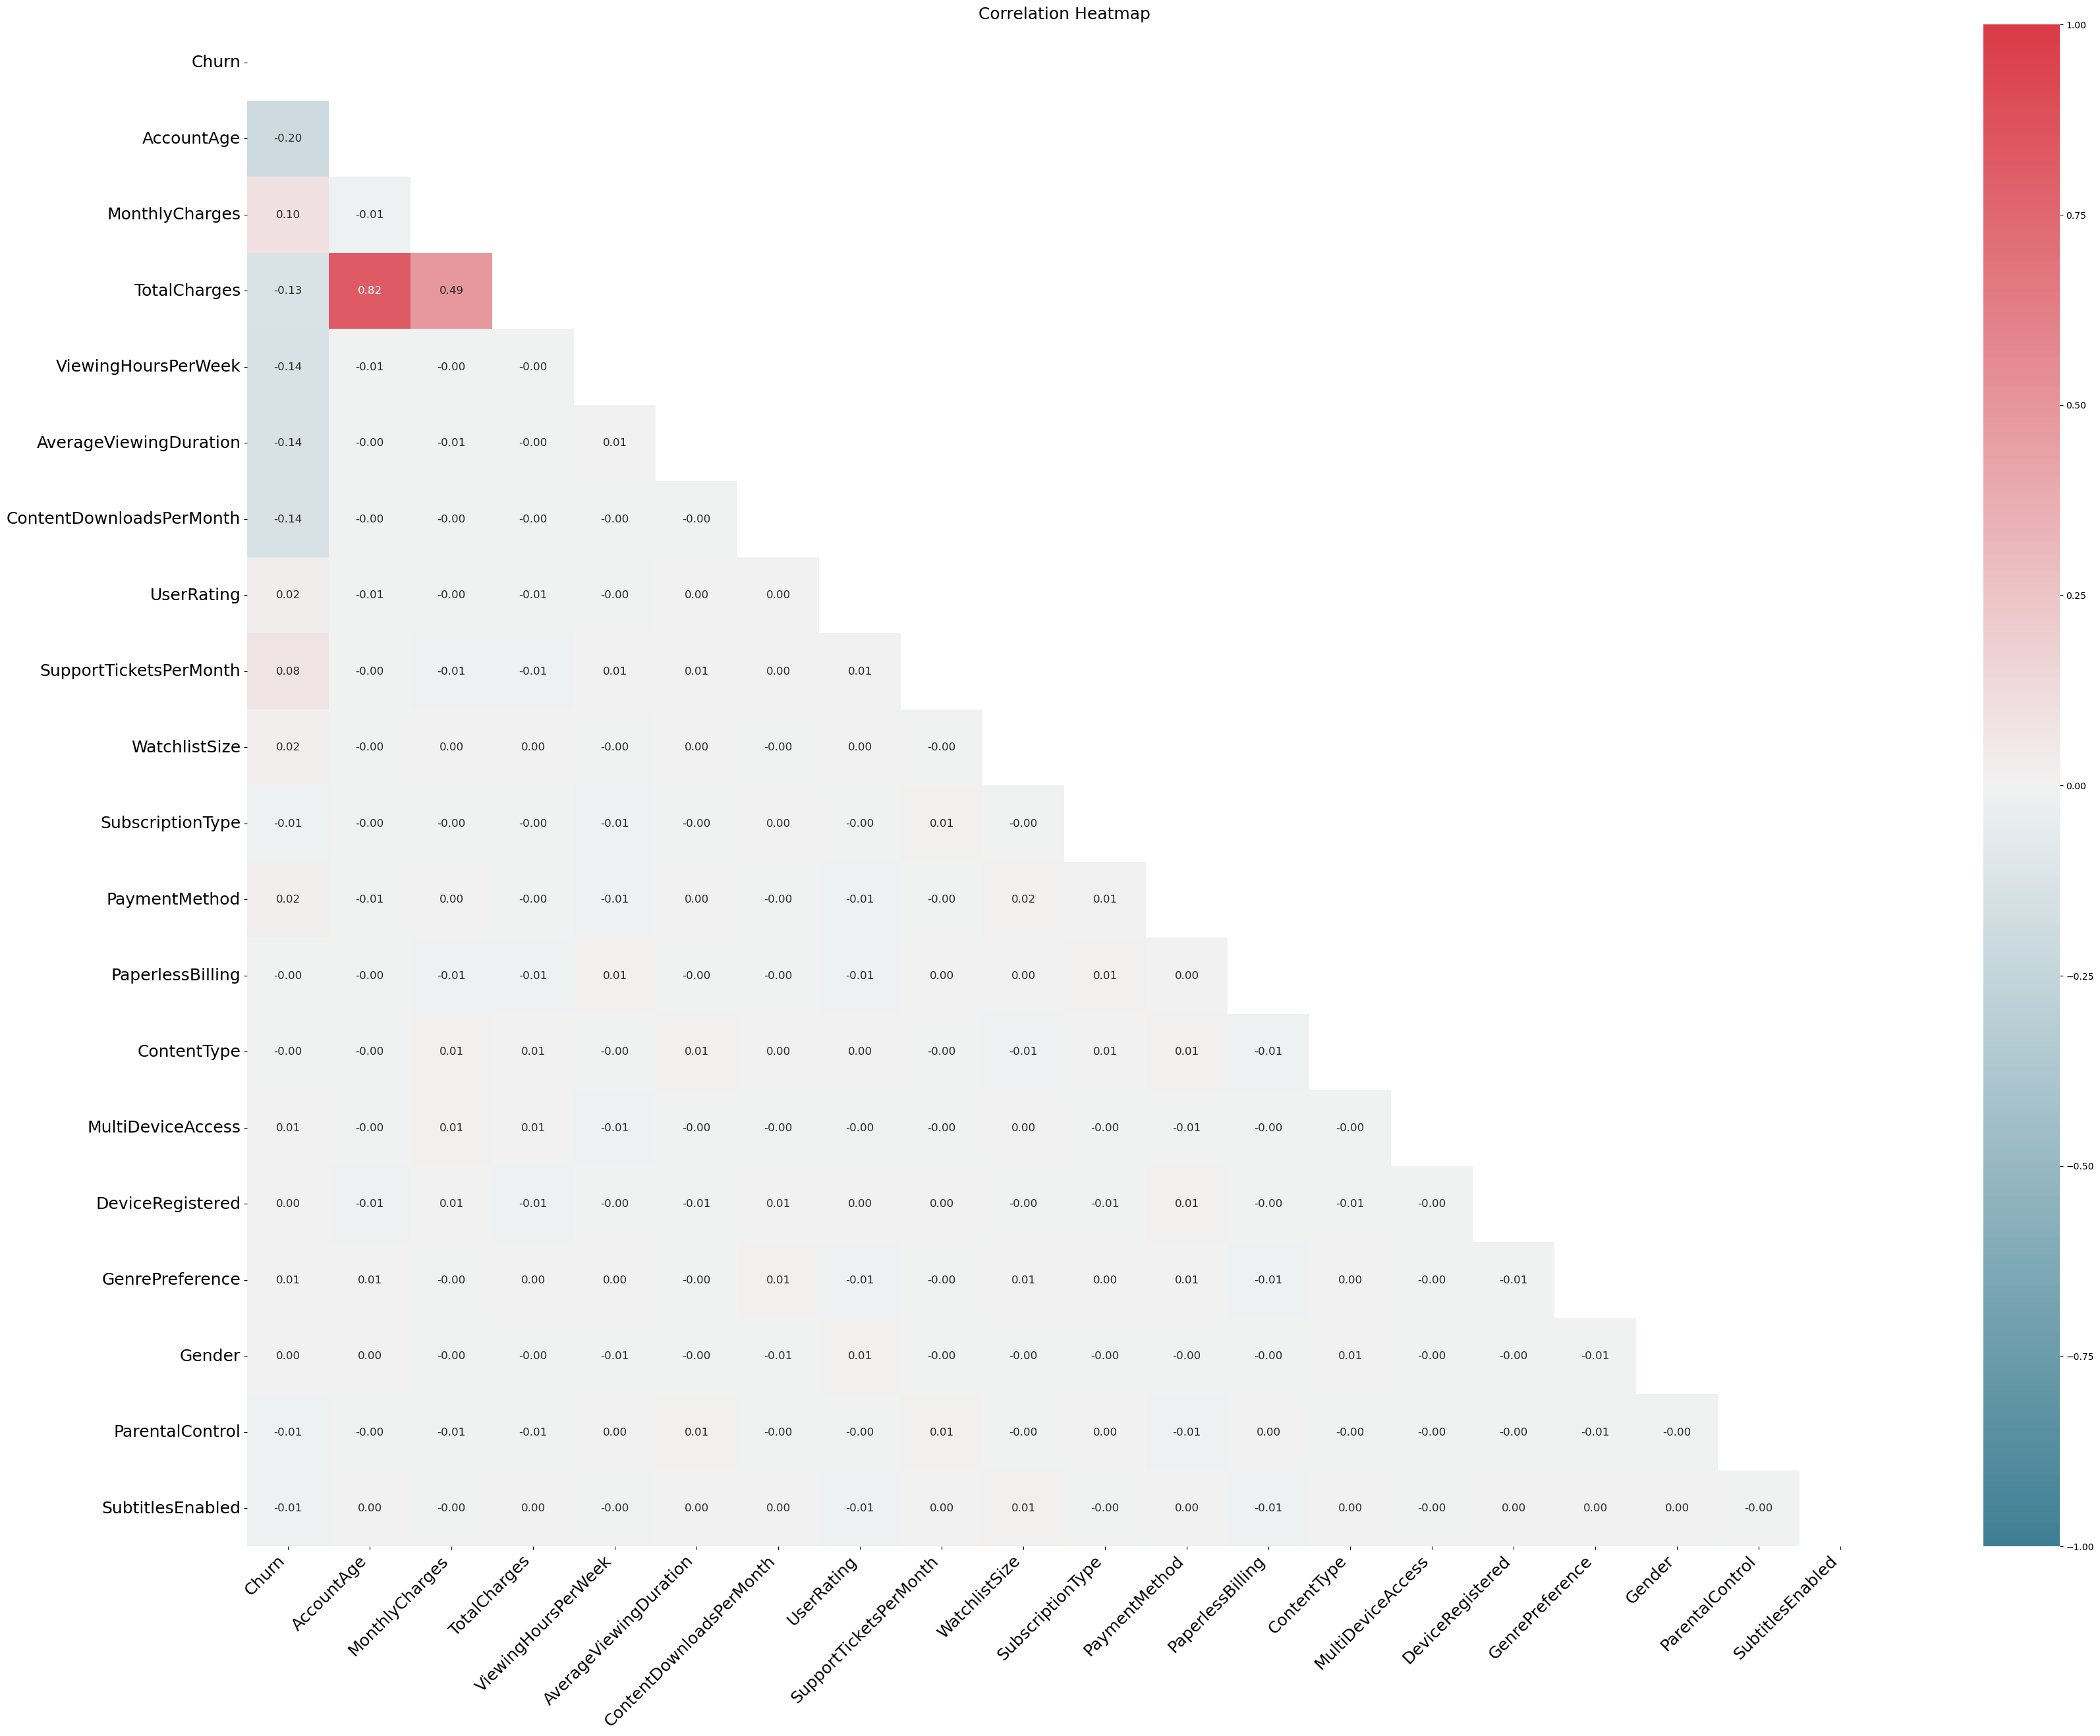

In [38]:
heat_map(data, data.columns.tolist())

We initially figure out:
* There are **`no variables that have a strong relationship`** with our target-Churn. This means, we could not determine the importance level for each variable. In another word, all features impact little or much to our target.
* There are a lot of **`features with zero or very low correlation`** to our target- Churn. We can **`drop`** these variables, such as PaperlessBilling, MultiDeviceAccess, DeviceRegistered, Gender, ParentalControl, SubtitlesEnabled.
* There are **`correlations among features`** such as AccountAge-TotalCharges, MonthlyCharges-TotalCharges, SubscriptionType_Standard-SubscriptionType_Premium, Paymentmethod_Mailed check,Electric check, Credit card, etc., which are the dummy variables. This is a problem when we use one-hot-encodeing (create dummy variable) for the categorical features have more than one classes even though we dropped one unnecessary dummy variables.

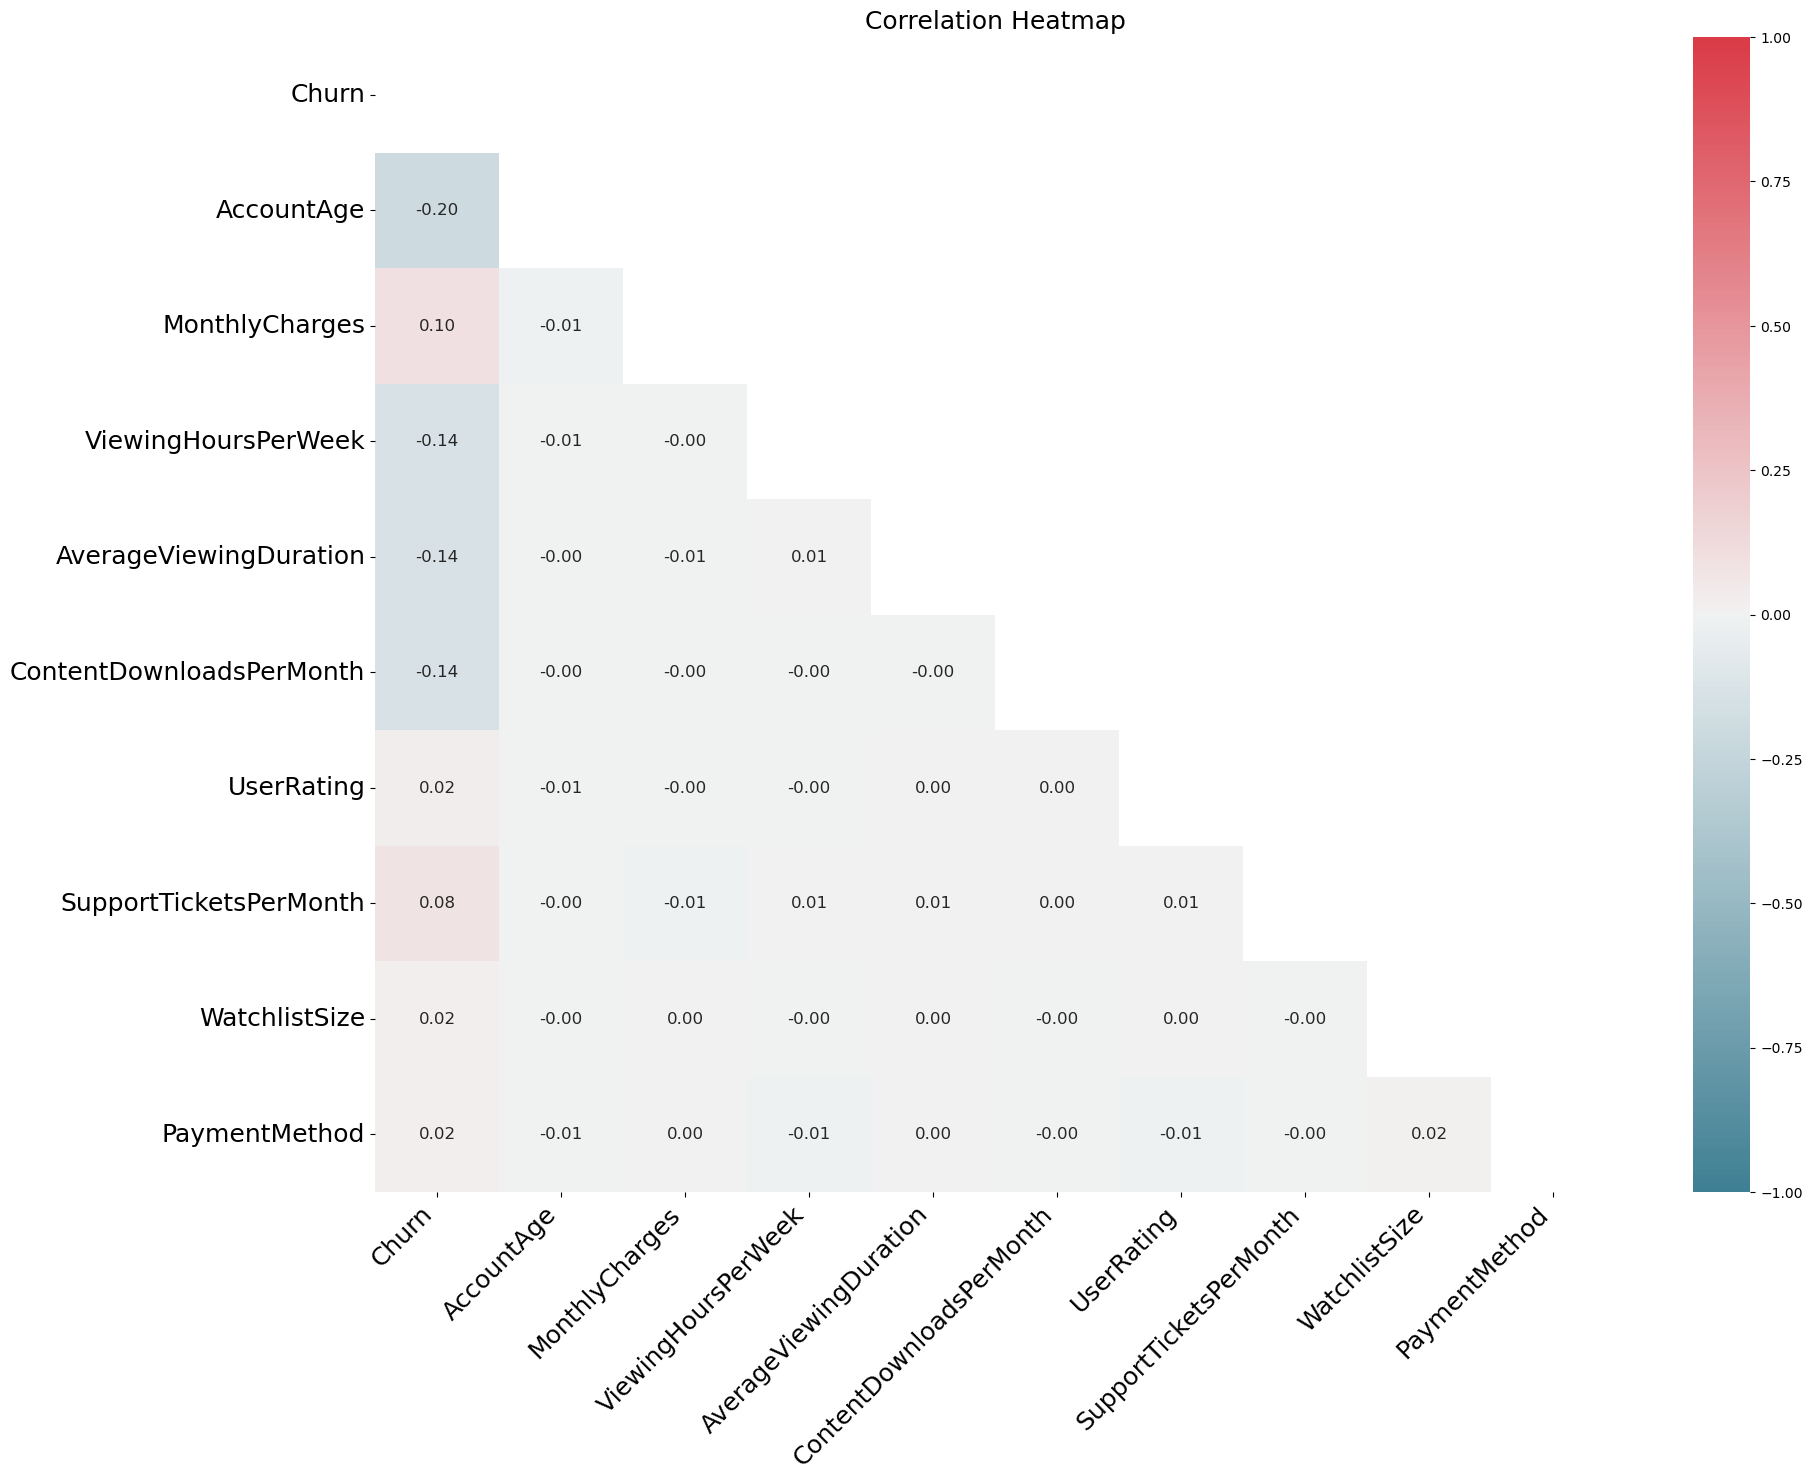

In [39]:
#Drop: PaperlessBilling, MultiDeviceAccess, DeviceRegistered, Gender, ParentalControl, SubtitlesEnabled
data=data.drop(['TotalCharges', 'PaperlessBilling', 'MultiDeviceAccess', 'DeviceRegistered', 'Gender', 'ParentalControl',\
    'SubtitlesEnabled', 'ContentType', 'GenrePreference', 'SubscriptionType'], axis =1)

heat_map(data, data.columns.tolist())

In [40]:
data.shape

(29923, 10)

In [41]:
data.isnull().sum()

Churn                       0
AccountAge                  0
MonthlyCharges              0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
UserRating                  0
SupportTicketsPerMonth      0
WatchlistSize               0
PaymentMethod               0
dtype: int64

In [42]:
data['Churn'].value_counts()

0    24478
1     5445
Name: Churn, dtype: int64

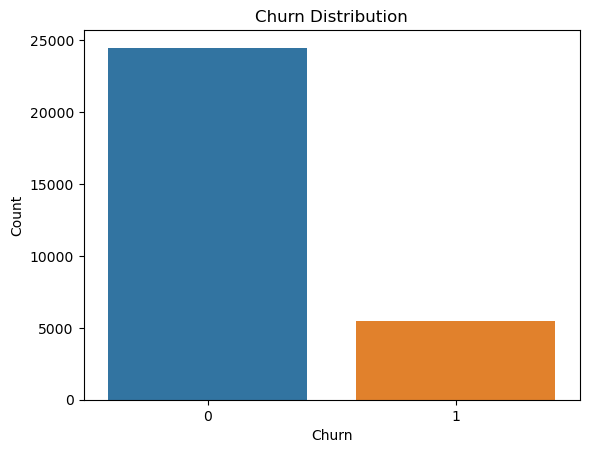

In [43]:
import seaborn as sns
# Assuming your dataset is named 'data' and contains a 'Churn' column
sns.countplot(data=data, x='Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()


Let's see what the relationship between Churn and attributes, and among attributes are:

Churn                       0
AccountAge                  0
MonthlyCharges              0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
UserRating                  0
SupportTicketsPerMonth      0
WatchlistSize               0
PaymentMethod               0
dtype: int64

In [44]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import plotly.express as px 

# Assuming 'df' is your dfFrame

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a Dash web application
app = dash.Dash(__name__)

# Helper function to create bar graphs
def create_bar_graph(x_df, y_df, orientation, title):
    return {
        'data': [
            go.Bar(
                x=x_df[df['Churn'] == churn],
                y=y_df[df['Churn'] == churn].index,
                orientation=orientation,
                name=f'{churn} Churn'
            )
            for churn in df['Churn'].unique()
        ],
        'layout': go.Layout(
            title=title,
            barmode='group'
        )
    }

# Define the layout of the app
app.layout = html.Div([
    html.H1("Customer Churn Analysis"),
    
    dcc.Graph(
        id='monthly-charges-vs-churn',
        figure=px.box(df, x='Churn', y='MonthlyCharges', title='Monthly Charges vs. Churn')
    ),
    
    dcc.Graph(
        id='account-age-vs-churn',
        figure=px.box(df, x='Churn', y='AccountAge', title='Account Age vs. Churn')
    ),
    
    dcc.Graph(
        id='viewing-hours-vs-churn',
        figure=px.box(df, x='Churn', y='ViewingHoursPerWeek', title='Viewing Hours Per Week vs. Churn')
    ),
    
    dcc.Graph(
        id='content-downloads-vs-churn',
        figure=create_bar_graph(
            x_df=df['ContentDownloadsPerMonth'],
            y_df=df,
            orientation='v',
            title='Content Downloads Per Month vs. Churn'
        )
    ),
    
    dcc.Graph(
        id='payment-method-vs-churn',
        figure=create_bar_graph(
            x_df=df['PaymentMethod'],
            y_df=df,
            orientation='v',
            title='Payment Method vs. Churn'
        )
    ),
    
    dcc.Graph(
        id='support-tickets-vs-churn',
        figure=create_bar_graph(
            x_df=df['SupportTicketsPerMonth'],
            y_df=df,
            orientation='v',
            title='Support Tickets Per Month vs. Churn'
        )
    ),
    
    dcc.Graph(
        id='watchlist-size-vs-churn',
        figure=create_bar_graph(
            x_df=df['WatchlistSize'],
            y_df=df,
            orientation='v',
            title='Watchlist Size vs. Churn'
        )
    ),
    
    dcc.Graph(
        id='user-rating-vs-churn',
        figure=px.box(df, x='Churn', y='UserRating', title='User Rating vs. Churn')
        )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/3b/8cnrvmc53q97m9nqbnvfytlm0000gn/T/ipykernel_5291/1021322730.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/3b/8cnrvmc53q97m9nqbnvfytlm0000gn/T/ipykernel_5291/1021322730.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html



<a id="7"></a>
## <h3 style="color: red;"><b>7. Fitting the Models:</b></h3>


<a id="71"></a>
### <h3 style="color: red;"><b>7.1. Data Splitting:</b></h3>

In [45]:
X = data.drop('Churn', axis =1)
Y= data['Churn']

In [46]:
# 4. Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=random_state, n_jobs=-1)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# 5. Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=random_state)

/Users/shinle/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.



In [47]:

#Initialize the StandardScaler
scaler = StandardScaler()

#Fit and transform the scaler on the training data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#Transform the test data using the same scaler
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [48]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [49]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34269, 9) (14687, 9) (34269,) (14687,)


In [50]:
#pip install --upgrade imbalanced-learn


In [51]:
#pip show imbalanced-learn


In [52]:
'''from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

brf = BalancedRandomForestClassifier(n_estimators=3000, random_state=0, sampling_strategy="all", replacement=True)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)'''

'from imblearn.ensemble import BalancedRandomForestClassifier\nfrom sklearn.metrics import balanced_accuracy_score\n\nbrf = BalancedRandomForestClassifier(n_estimators=3000, random_state=0, sampling_strategy="all", replacement=True)\nbrf.fit(X_train, y_train)\ny_pred = brf.predict(X_test)\nbalanced_accuracy_score(y_test, y_pred)'

In [53]:
'''accuracy_score(y_test, y_pred)'''

'accuracy_score(y_test, y_pred)'

In [54]:
'''display_confusion_matrix(y_test, y_pred)'''

'display_confusion_matrix(y_test, y_pred)'


<a id="72"></a>
### <h3 style="color: red;"><b>7.2. Fitting a Full Model with Logistic Regression:</b></h3>

The full model contains all features including the correlated ones but the dropped ones like TotalCharges.

# Assuming X and Y are your feature matrix and target variable
X1= sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.Logit(y_train, X1)
full_model=model.fit()

# Get the summary
full_model.summary()

We can see that many feature/predictor variables have the p-values greater than the significant level 0.05. There are many unsignificant features. So, the full model is not a good model for our data, of course.

X1_test= sm.add_constant(X_test)
y_pred=full_model.predict(exog=X1_test)
y_pred

Churn = np.array([0]*y_pred.shape[0]) 
Churn[y_pred>0.5] = 1

display_confusion_matrix(y_test, Churn)

Therefore, we need to use the **feature selection** technique to choose the best features before we fit a model.



<a id="73"></a>
<h3 style="color: red;"><b>7.3. Machine Learning Model Evaluations and Predictions:</b></h3>

In [55]:
metrics_df = pd.DataFrame(columns=['Model', 'precision_score', 'recall_score', 'f1_score','Balanced accuracy']) # these metrics are used to evalueate our models

In [56]:
modeling = pd.DataFrame(columns=['Model'])


<a id="731"></a>
#### <h3 style="color: red;"><b>7.3.1. Using Sequential Feature Selection for the Logistic Regression</b></h3>

Let's try the **Sequential Feature Selection** method to choose 10 - 15 significant variables for our model.

[Sequential Feature Selection:](https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance)
 

* Sequential Feature Selection (SFS) is available in the SequentialFeatureSelector transformer. SFS can be either forward or backward:

* `Forward`-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

* `Backward`-SFS follows the same idea but works in the opposite direction: instead of starting with no features and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.

In [57]:
from sklearn.feature_selection import SequentialFeatureSelector

LR=LogisticRegressionCV( penalty ='l2', cv= 5,  random_state=0)
sfs = SequentialFeatureSelector(LR, direction ='forward',  n_features_to_select=7).fit(X_train, y_train)


solver: For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;\
penalty: l1 = lasso regression, l2= ridge regression


In [58]:
best_features=sfs.get_feature_names_out()
best_features

array(['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth',
       'SupportTicketsPerMonth', 'PaymentMethod'], dtype=object)

In [59]:
X_train=X_train[best_features]
X_test=X_test[best_features]

In [60]:
X1=sfs.transform(X)
X1.shape

(29923, 7)

In [61]:

LR =LogisticRegression(solver='liblinear', penalty ='l2')
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
LR.score(X_test,y_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6870701981344046


In [62]:
balanced_accuracy_score(y_test, y_pred)

0.6870694618779947

y_pred

In [63]:
y_pred_prob=LR.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

0.587382743029529

In [64]:

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(LR).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [LR]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      7342
           1       0.69      0.69      0.69      7345

    accuracy                           0.69     14687
   macro avg       0.69      0.69      0.69     14687
weighted avg       0.69      0.69      0.69     14687



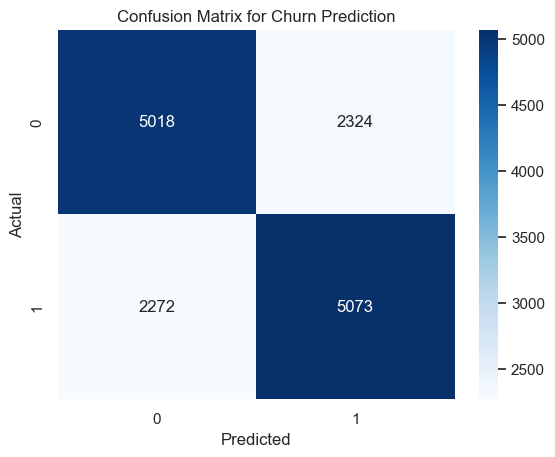

In [65]:
display_confusion_matrix(y_test, y_pred)



<a id="732"></a>
#### <h3 style="color: red;"><b>7.3.2. Decision Tree</b></h3>

We will fit many decision tree in a range of depth, and then we will choose the best classifier with the minimum *log loss*. Lower log loss values indicate better model performance. It is also known as "logarithmic loss" or "cross-entropy loss." It measures the dissimilarity between the true labels and the predicted probabilities assigned to those labels.\ 
**Log loss** is particularly important when working with probabilistic classification models, such as logistic regression or neural networks, where the model provides probabilities for class assignments.

In [66]:
#best_churn_tree = DecisionTreeClassifier(criterion='entropy')
best_churn_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#best_churn_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4,max_leaf_nodes=20,min_samples_split=10,min_samples_leaf=5,min_impurity_decrease=0.01)

best_churn_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)


<div class="alert alert-block alert-warning">
<b>Issue:</b>  One problem of this Decision Tree is two leaves with the same class (i.e., they both predict the same outcome) and they stem from the same parent node, it means that the decision tree has found a split or condition that doesn't contribute any additional information to the classification task at that specific level of the tree. 
</div>

So, let's try a pruned tree corresponding to the optimal tree size obtained using cross-validation

<a id="733"></a>
#### <h3 style="color: red;"><b>7.3.3. A Pruned Tree</b></h3>


In [67]:
#tree=DecisionTreeClassifier(criterion='entropy',random_state=0,max_leaf_nodes=20).fit(X_train, y_train)

ccp_path = best_churn_tree.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10,random_state=0,shuffle=True)

grid = skm.GridSearchCV(best_churn_tree,{'ccp_alpha': ccp_path.ccp_alphas},refit=True,cv=kfold,scoring='accuracy', n_jobs=-1) 
grid.fit(X_train, y_train)
print(f"Best Cross-Validation Score: {grid.best_score_}")

best_tree = grid.best_estimator_ 
print(best_tree)
print(f"Best Tree Depth: {best_tree.get_depth()}")

Best Cross-Validation Score: 0.6619097919393246
DecisionTreeClassifier(criterion='entropy', max_depth=4)
Best Tree Depth: 4


In [68]:
print("Number of terminal nodes: ",best_tree.get_n_leaves())

Number of terminal nodes:  16


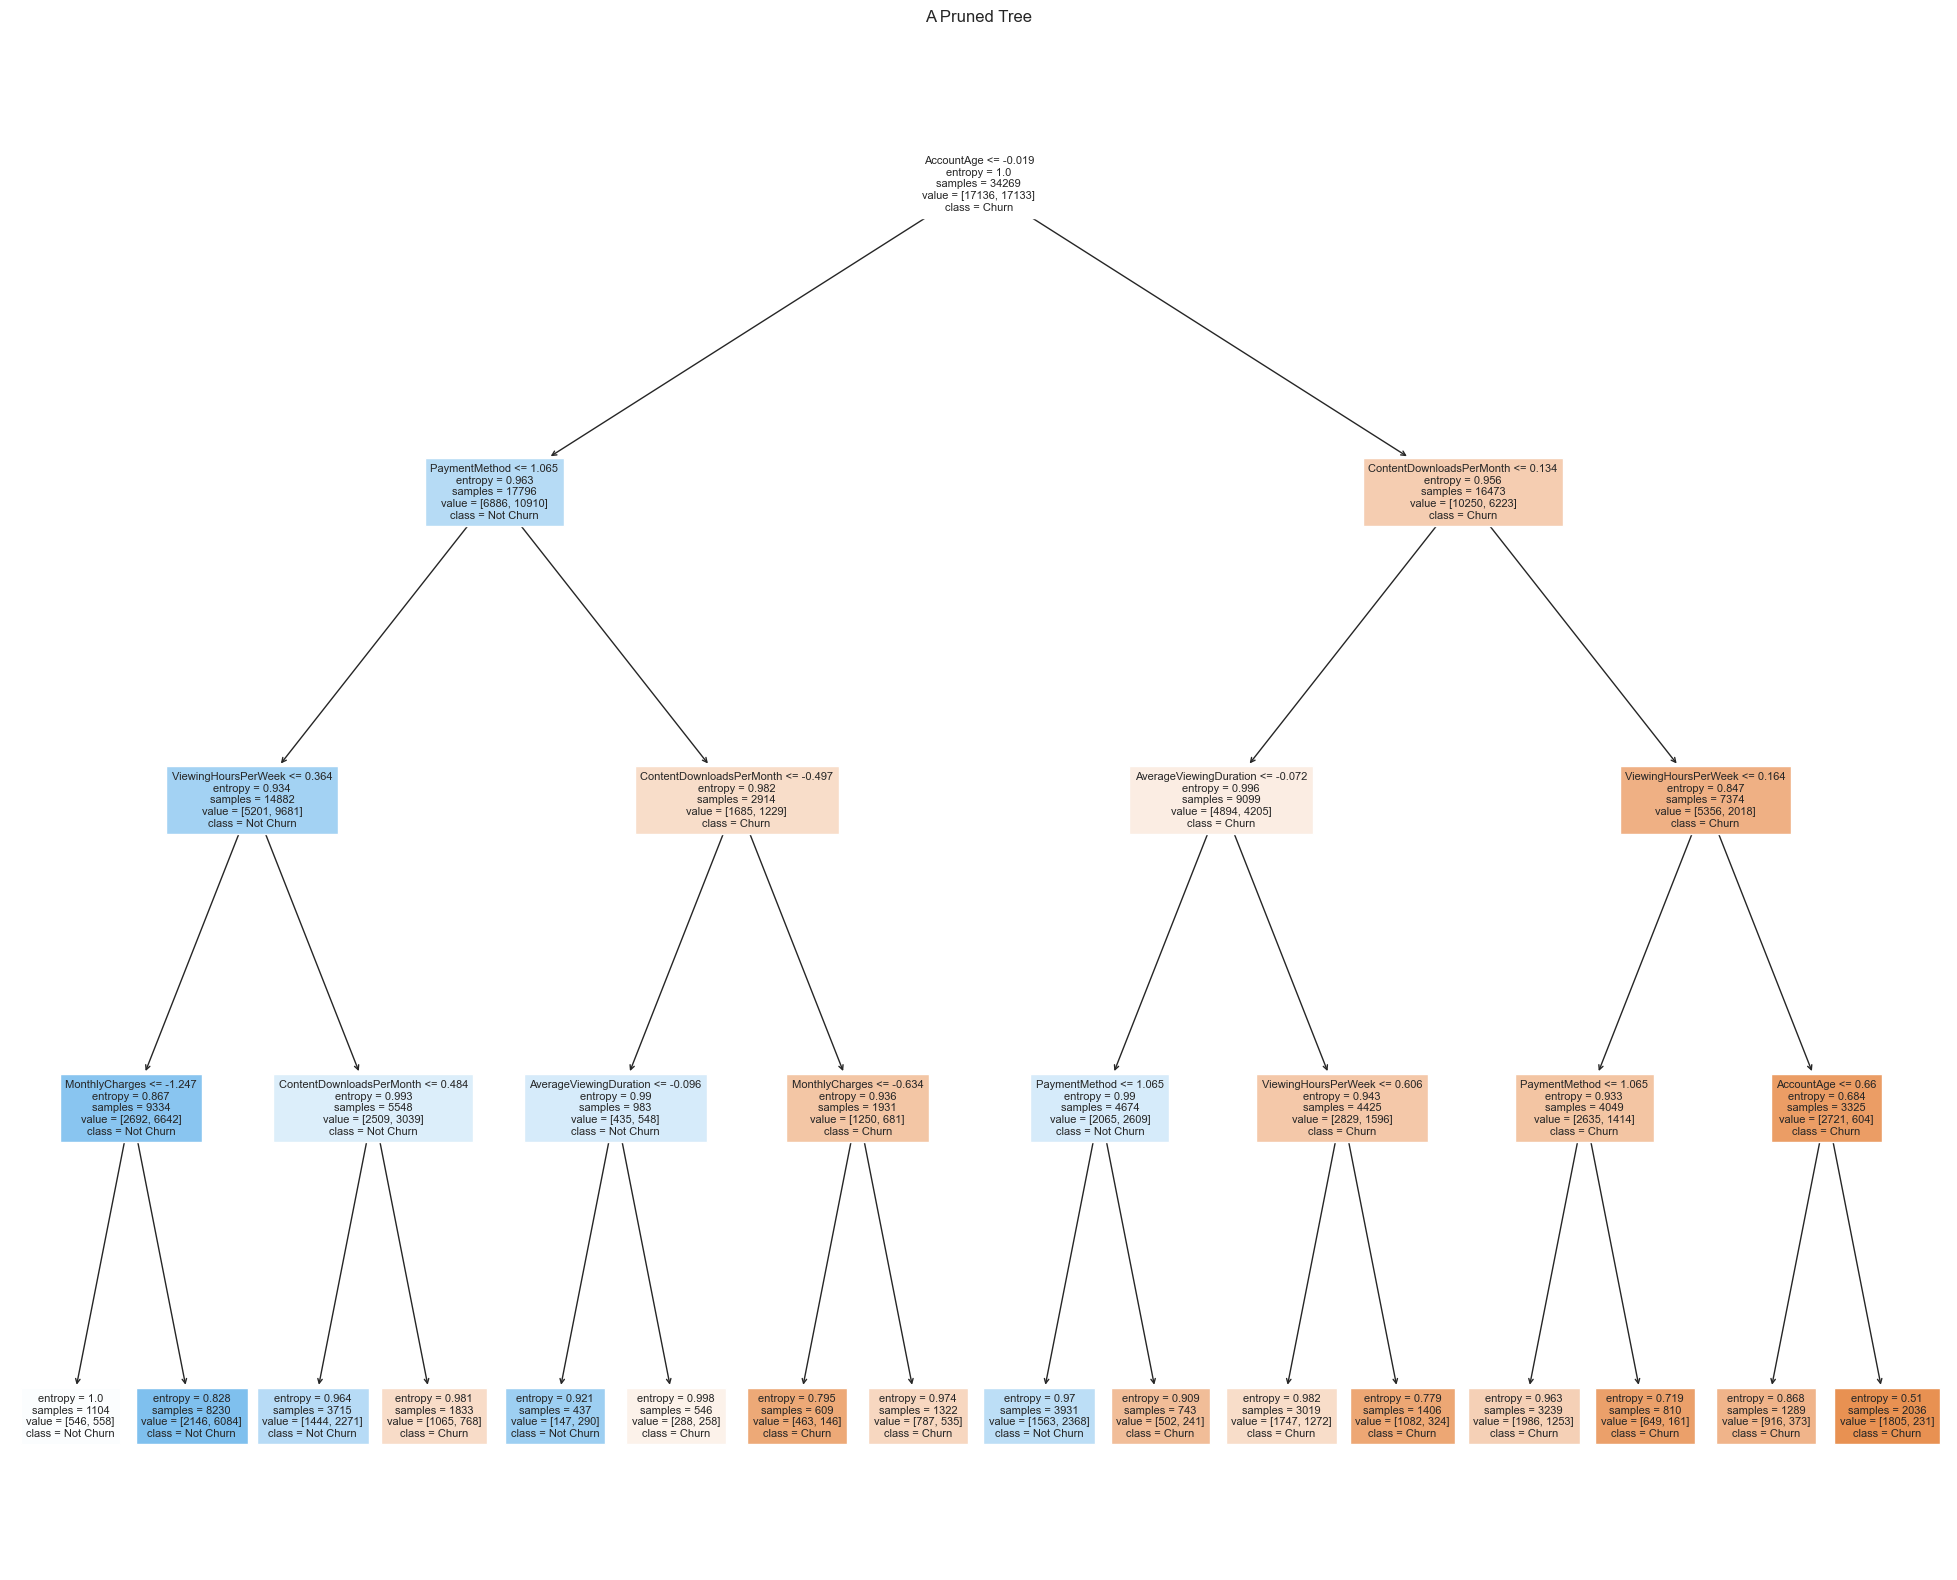

In [69]:

# Plot the decision tree with clearer visualization
plt.figure(figsize=(25, 20))  # Adjust the figure size

plot_tree(
    best_tree,
    filled=True,  # Fill nodes with color
    feature_names=X_train.columns,  # Provide feature names for labeling
    class_names=["Churn", "Not Churn"],  # Provide class labels for labeling
    #rounded=True,  # Use rounded boxes
    fontsize=8,  # Adjust font size
)

plt.title("A Pruned Tree")
plt.show()

In [70]:
print(export_text(best_tree,feature_names=list(X_train.columns),show_weights=True))

|--- AccountAge <= -0.02
|   |--- PaymentMethod <= 1.07
|   |   |--- ViewingHoursPerWeek <= 0.36
|   |   |   |--- MonthlyCharges <= -1.25
|   |   |   |   |--- weights: [546.00, 558.00] class: 1
|   |   |   |--- MonthlyCharges >  -1.25
|   |   |   |   |--- weights: [2146.00, 6084.00] class: 1
|   |   |--- ViewingHoursPerWeek >  0.36
|   |   |   |--- ContentDownloadsPerMonth <= 0.48
|   |   |   |   |--- weights: [1444.00, 2271.00] class: 1
|   |   |   |--- ContentDownloadsPerMonth >  0.48
|   |   |   |   |--- weights: [1065.00, 768.00] class: 0
|   |--- PaymentMethod >  1.07
|   |   |--- ContentDownloadsPerMonth <= -0.50
|   |   |   |--- AverageViewingDuration <= -0.10
|   |   |   |   |--- weights: [147.00, 290.00] class: 1
|   |   |   |--- AverageViewingDuration >  -0.10
|   |   |   |   |--- weights: [288.00, 258.00] class: 0
|   |   |--- ContentDownloadsPerMonth >  -0.50
|   |   |   |--- MonthlyCharges <= -0.63
|   |   |   |   |--- weights: [463.00, 146.00] class: 0
|   |   |   |--- Mo

In [71]:
y_pred=best_tree.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      7342
           1       0.66      0.67      0.66      7345

    accuracy                           0.66     14687
   macro avg       0.66      0.66      0.66     14687
weighted avg       0.66      0.66      0.66     14687



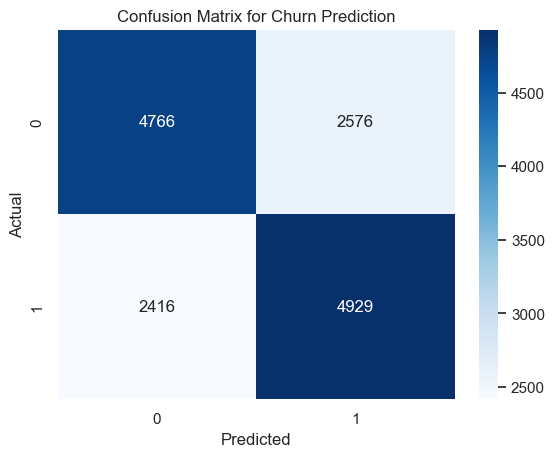

In [72]:
display_confusion_matrix(y_test, y_pred)

In [73]:
print(balanced_accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.6601053387181447
0.6601075781303193


In [74]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(best_tree).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [best_tree]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)

We got a better accuracy but We still have the same problem  of two predicted leaves with the same class in our decision tree, even after pruning the tree. The problem of having two leaves with the same class in a decision tree is indicative of a limitation of decision trees for your dataset. While decision trees are powerful and interpretable models, they may not be well-suited for all types of data and classification problems. 


We consider **Ensemble Methods**: We might consider using ensemble methods like **Random Forest** or **Gradient Boosting**. Ensemble methods combine multiple decision trees to improve predictive performance and reduce overfitting.



<a id="734"></a>
####  <h3 style="color: red;"><b>7.3.4. Ensemble Method: Random Forest Classifier</b></h3>


In [75]:
RFC = RandomForestClassifier(n_estimators=2500,max_depth=4, random_state=0).fit(X_train, y_train)
y_hat_RF = RFC.predict(X_test) 

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      7342
           1       0.68      0.70      0.69      7345

    accuracy                           0.69     14687
   macro avg       0.69      0.69      0.69     14687
weighted avg       0.69      0.69      0.69     14687



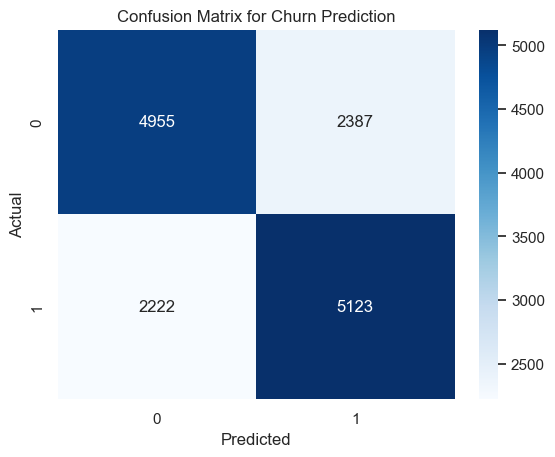

In [76]:
display_confusion_matrix(y_test,y_hat_RF) 


In [77]:
feature_imp = pd.DataFrame( {'importance':RFC.feature_importances_}, index=X_train.columns.tolist())
sorted_feature_imp= feature_imp.sort_values(by='importance', ascending=False)

In [78]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_hat_RF)
recall = recall_score(y_test, y_hat_RF)
f1 = f1_score(y_test, y_hat_RF)
balanced_accuracy = balanced_accuracy_score(y_test, y_hat_RF)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(RFC).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [RFC]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)

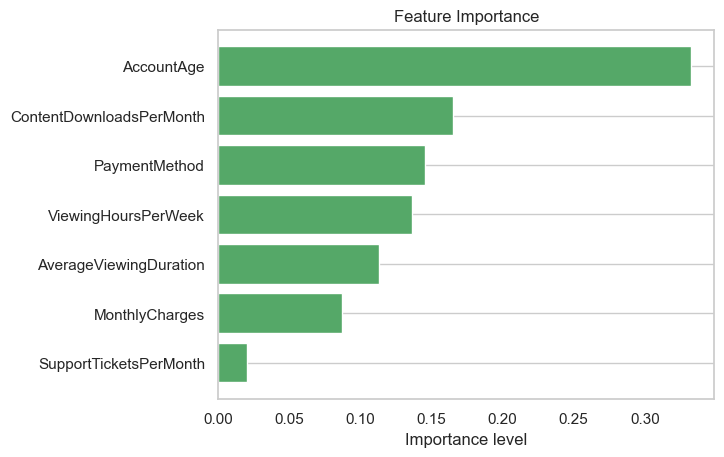

In [79]:

plt.barh(sorted_feature_imp.index,sorted_feature_imp['importance'],color = 'g')
plt.xlabel('Importance level')
plt.title('Feature Importance')
plt.grid(axis='x')  # Add a grid on the x-axis
plt.gca().invert_yaxis()


plt.show()

There are at least six importance features which need to consider in our model.


<a id="735"></a>
#### <h3 style="color: red;"><b>7.3.5. Ensemble Method: Gradient Boosting Classifier</b></h3>


In [80]:
#Define a grid of hyperparameters to search
'''param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }'''
#param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}
param_grid = {'learning_rate': [0.1]}


grid_search = skm.GridSearchCV(GradientBoostingClassifier(n_estimators=2500, max_depth=4, random_state=0),\
    param_grid, cv=10, n_jobs=-1)

# Create a grid search object
#grid_search = skm.GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best learning rate
best_learning_rate = grid_search.best_params_['learning_rate']

# Access the best classifier
GBC = grid_search.best_estimator_

# Access the best hyperparameters
best_hyperparameters = grid_search.best_params_


In [81]:

y_hat = GBC.predict(X_test)

In [82]:
print(balanced_accuracy_score(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

0.7242430831018012
0.724245931776401


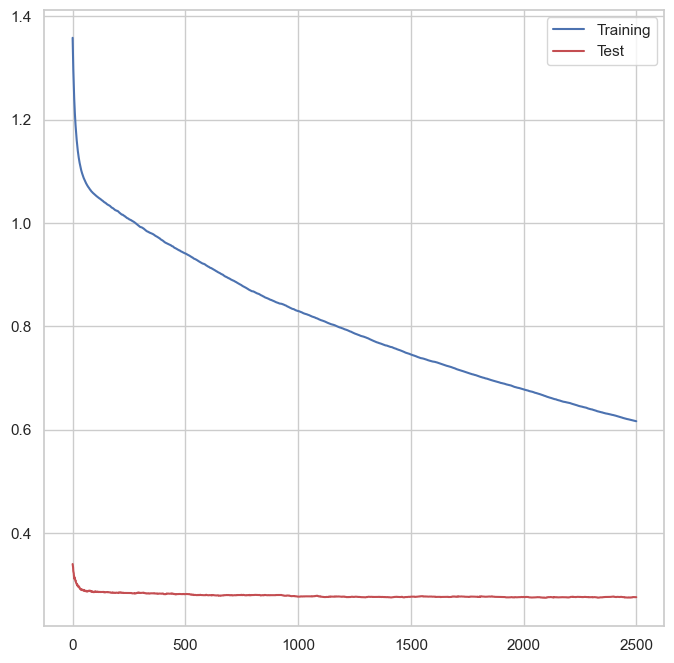

In [83]:
test_error = np.zeros_like(GBC.train_score_)

for idx, y_ in enumerate(GBC.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(GBC.train_score_.shape[0]) 

ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,GBC.train_score_, 'b',label='Training')
ax.plot(plot_idx, test_error ,'r',label='Test') 
ax.legend();

In [84]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(GBC).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [GBC]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      7342
           1       0.72      0.74      0.73      7345

    accuracy                           0.72     14687
   macro avg       0.72      0.72      0.72     14687
weighted avg       0.72      0.72      0.72     14687



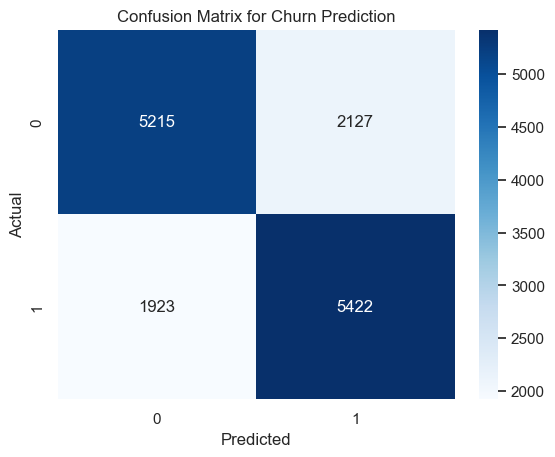

In [85]:
display_confusion_matrix(y_test,y_hat)


<a id="736"></a>
#### <h3 style="color: red;"><b>7.3.6. Support Vector Machine (SVM)</b></h3>

* Scaling data before fitting the SVM

* Define Your SVM Classifier and Hyperparameter Grid:

In [86]:
svm = SVC(random_state=0)  # You can specify kernel, C, gamma, etc.
'''param_grid = {
    'C': [0.1, 1, 10],  # Different values of the regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'gamma': ['scale', 'auto']  # Different gamma values
}'''
param_grid ={'kernel':['linear']}

* Create Cross-Validation Splitter:

In [87]:
cross_validator = skm.KFold(n_splits=5, shuffle=True, random_state=0)


* Perform Grid Search with Cross-Validation:

In [88]:
grid_search = skm.GridSearchCV(svm, param_grid, cv=cross_validator, scoring='accuracy', n_jobs=-1, refit=True)
grid_search.fit(X_train, y_train)  # X: feature matrix, y: target variable


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'kernel': ['linear']}, scoring='accuracy')

* Or, if you prefer to use random search (with RandomizedSearchCV):

In [89]:
'''from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(svm, param_distributions=param_grid, cv=cross_validator, scoring='accuracy', n_iter=10)
random_search.fit(X, y)'''


"from sklearn.model_selection import RandomizedSearchCV\n\nrandom_search = RandomizedSearchCV(svm, param_distributions=param_grid, cv=cross_validator, scoring='accuracy', n_iter=10)\nrandom_search.fit(X, y)"

* Retrieve the Best Model and Parameters:


In [90]:
SVM_model = grid_search.best_estimator_  # or random_search.best_estimator_
best_params = grid_search.best_params_  # or random_search.best_params_
best_score = grid_search.best_score_  # or random_search.best_score_


* Evaluate the Model:


In [91]:
#SVM_model.train_score_

In [92]:
best_score

0.6920247878336815

In [93]:
print(balanced_accuracy_score(y_test, SVM_model.predict(X_test)))


0.6866583504846089


In [94]:
best_params

{'kernel': 'linear'}

In [95]:
test_accuracy = SVM_model.score(X_test, y_test)  # X_test: test features, y_test: test labels


* Plot Decision Function ( D dimension- hard to do this)

* Display confusion matrix

In [96]:
y_hat = SVM_model.predict(X_test)

In [97]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
balanced_accuracy = balanced_accuracy_score(y_test, y_hat)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(SVM_model).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [SVM_model]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)


              precision    recall  f1-score   support

           0       0.69      0.67      0.68      7342
           1       0.68      0.70      0.69      7345

    accuracy                           0.69     14687
   macro avg       0.69      0.69      0.69     14687
weighted avg       0.69      0.69      0.69     14687



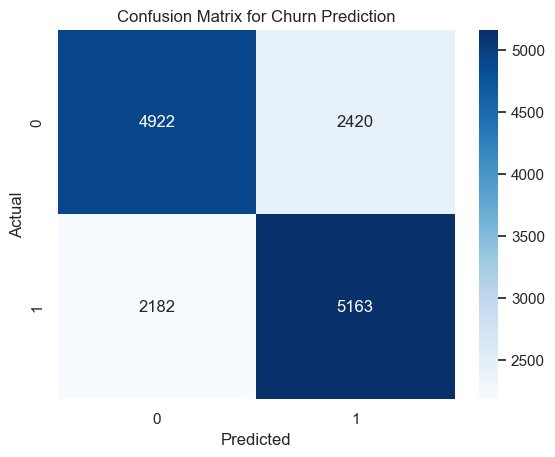

In [98]:
display_confusion_matrix(y_test,y_hat)

In [99]:
'''from ISLP.svm import plot as plot_svm
def plot_some_SVM(X, y, best_SVC):
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

   
    for i, ax in enumerate(axes.flat):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plot_svm(X, y, best_SVC, ax=ax, features=(i+1, 5),scatter_cmap='summer',decision_cmap = 'Set2')
        #built-in colormaps like 'cividis', 'plasma', 'cool', 'hot', 'jet', inferno', 'magma'

        # Add title and labels
        ax.set_title(f"The Best {best_SVC.kernel} SVC: {X.columns[i+1]} vs {X.columns[5]}")
        ax.set_xlabel(f"{X.columns[i+1]}")
        ax.set_ylabel(f"{X.columns[5]}")
        
    # Display the plot
    plt.show()
    
plot_some_SVM(X_train, y_train, SVM_model)'''

'from ISLP.svm import plot as plot_svm\ndef plot_some_SVM(X, y, best_SVC):\n    # Create a 2x2 grid of subplots\n    fig, axes = plt.subplots(2, 2, figsize=(10, 10))\n    plt.subplots_adjust(wspace=0.4, hspace=0.4)\n\n   \n    for i, ax in enumerate(axes.flat):\n        # Plot the decision boundary. For that, we will assign a color to each\n        # point in the mesh [x_min, x_max]x[y_min, y_max].\n        plot_svm(X, y, best_SVC, ax=ax, features=(i+1, 5),scatter_cmap=\'summer\',decision_cmap = \'Set2\')\n        #built-in colormaps like \'cividis\', \'plasma\', \'cool\', \'hot\', \'jet\', inferno\', \'magma\'\n\n        # Add title and labels\n        ax.set_title(f"The Best {best_SVC.kernel} SVC: {X.columns[i+1]} vs {X.columns[5]}")\n        ax.set_xlabel(f"{X.columns[i+1]}")\n        ax.set_ylabel(f"{X.columns[5]}")\n        \n    # Display the plot\n    plt.show()\n    \nplot_some_SVM(X_train, y_train, SVM_model)'

In [100]:
# Assuming X_train is your training data DataFrame
support_vector_indices = SVM_model.support_
support_vectors = X_train.iloc[support_vector_indices, :]

# Identify which features are most important
average_support_vector = support_vectors.mean(axis=0)
most_important_features = np.argsort(np.abs(average_support_vector))[::-1]
sorted_features = most_important_features.sort_values()


print("Feature Importance:\n\n", sorted_features)


Feature Importance:

 PaymentMethod               0
SupportTicketsPerMonth      1
ViewingHoursPerWeek         2
AccountAge                  3
ContentDownloadsPerMonth    4
AverageViewingDuration      5
MonthlyCharges              6
dtype: int64


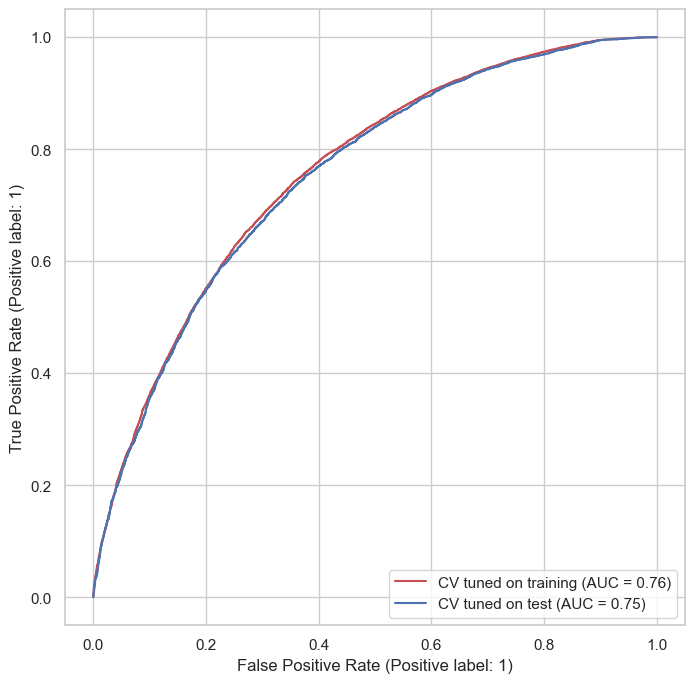

In [101]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

fig, ax = subplots(figsize=(8,8)) 
for (X_, y_, c, name) in zip((X_train, X_test), (y_train, y_test),\
    ('r', 'b'),('CV tuned on training','CV tuned on test')): 
    
    roc_curve(SVM_model,X_,y_, name=name, ax=ax, color=c)

In [102]:
metrics_df

,Model,precision_score,recall_score,f1_score,Balanced accuracy
0,LogisticRegression,0.685819,0.690674,0.688238,0.687069
1,DecisionTreeClassifier,0.656762,0.671069,0.663838,0.660105
2,RandomForestClassifier,0.682157,0.697481,0.689734,0.686183
3,GradientBoostingClassifier,0.656762,0.671069,0.663838,0.660105
4,SVC,0.680865,0.702927,0.691720,0.686658


<a id="737"></a>
####  <h3 style="color: red;"><b>7.3.7. Additional Model: Neural Network</b></h3>



In [103]:
#%pip install tensorflow

Epoch 1/10
536/536 [==============================] - 1s 996us/step - loss: 0.6271 - accuracy: 0.6503 - val_loss: 0.5871 - val_accuracy: 0.6907
Epoch 2/10
536/536 [==============================] - 0s 821us/step - loss: 0.5981 - accuracy: 0.6865 - val_loss: 0.5825 - val_accuracy: 0.6936
Epoch 3/10
536/536 [==============================] - 0s 821us/step - loss: 0.5909 - accuracy: 0.6914 - val_loss: 0.5792 - val_accuracy: 0.6951
Epoch 4/10
536/536 [==============================] - 0s 847us/step - loss: 0.5875 - accuracy: 0.6936 - val_loss: 0.5779 - val_accuracy: 0.6976
Epoch 5/10
536/536 [==============================] - 0s 816us/step - loss: 0.5852 - accuracy: 0.6947 - val_loss: 0.5769 - val_accuracy: 0.6967
Epoch 6/10
536/536 [==============================] - 0s 825us/step - loss: 0.5823 - accuracy: 0.6975 - val_loss: 0.5737 - val_accuracy: 0.6984
Epoch 7/10
536/536 [==============================] - 0s 814us/step - loss: 0.5803 - accuracy: 0.6979 - val_loss: 0.5725 - val_accuracy:

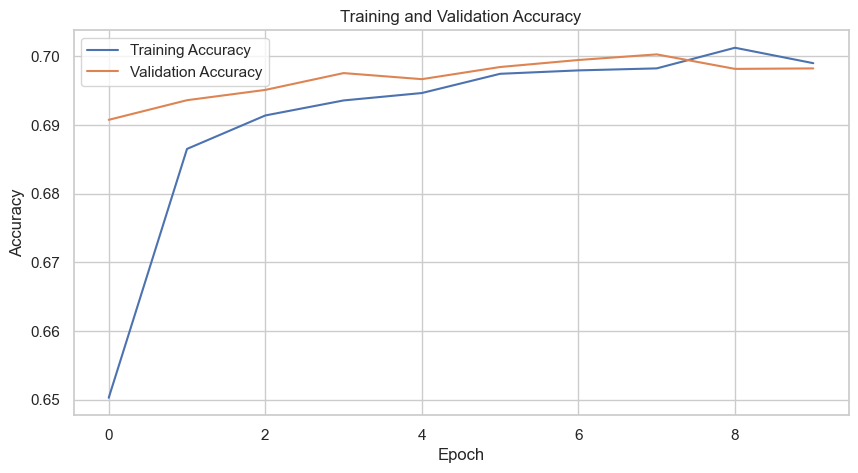

In [104]:
import tensorflow as tf


# Build the neural network model
NN_model= tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = NN_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = NN_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [105]:
# Make predictions on the test set
y_pred = NN_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(np.int32)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_binary)

# Print the results
print(f'F1 Score: {f1:.4f}')
print(f'Balanced Accuracy: {balanced_acc:.4f}')

459/459 [==============================] - 0s 352us/step
F1 Score: 0.6923
Balanced Accuracy: 0.6982


In [106]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(NN_model).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [NN_model]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)

<a id="738"></a>
####  <h3 style="color: red;"><b>7.3.8. Additional Model: AdaBoost</b></h3>

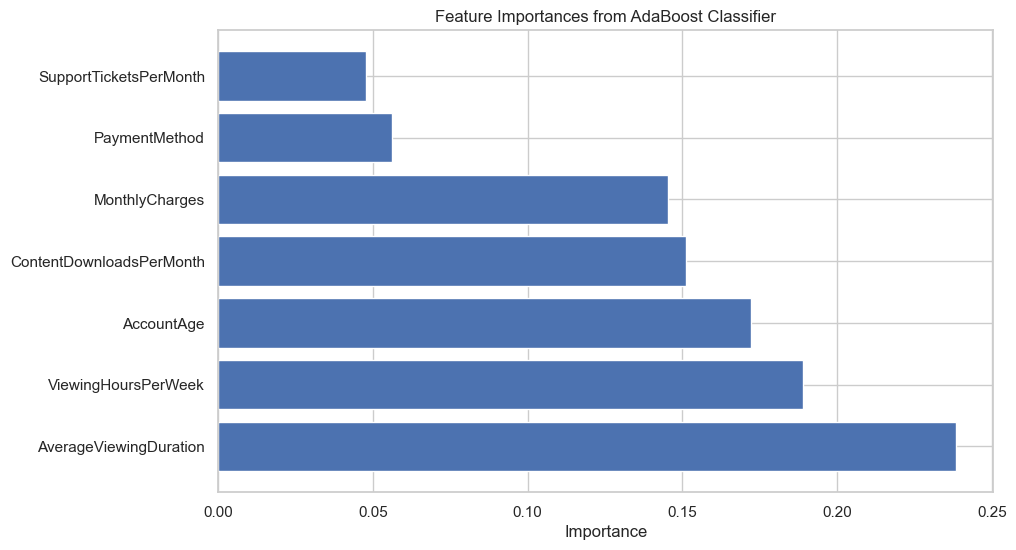

In [107]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train the model
AB = AdaBoostClassifier(estimator = best_tree, n_estimators=15, random_state=0)
AB.fit(X_train, y_train)

# Make predictions
y_hat = AB.predict(X_test)

# Get feature importances
feature_importances = AB.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming you have column names in X_train
    'Importance': feature_importances
})

feature_importance_df.set_index('Feature', inplace=True)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.index, feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from AdaBoost Classifier')
plt.show()


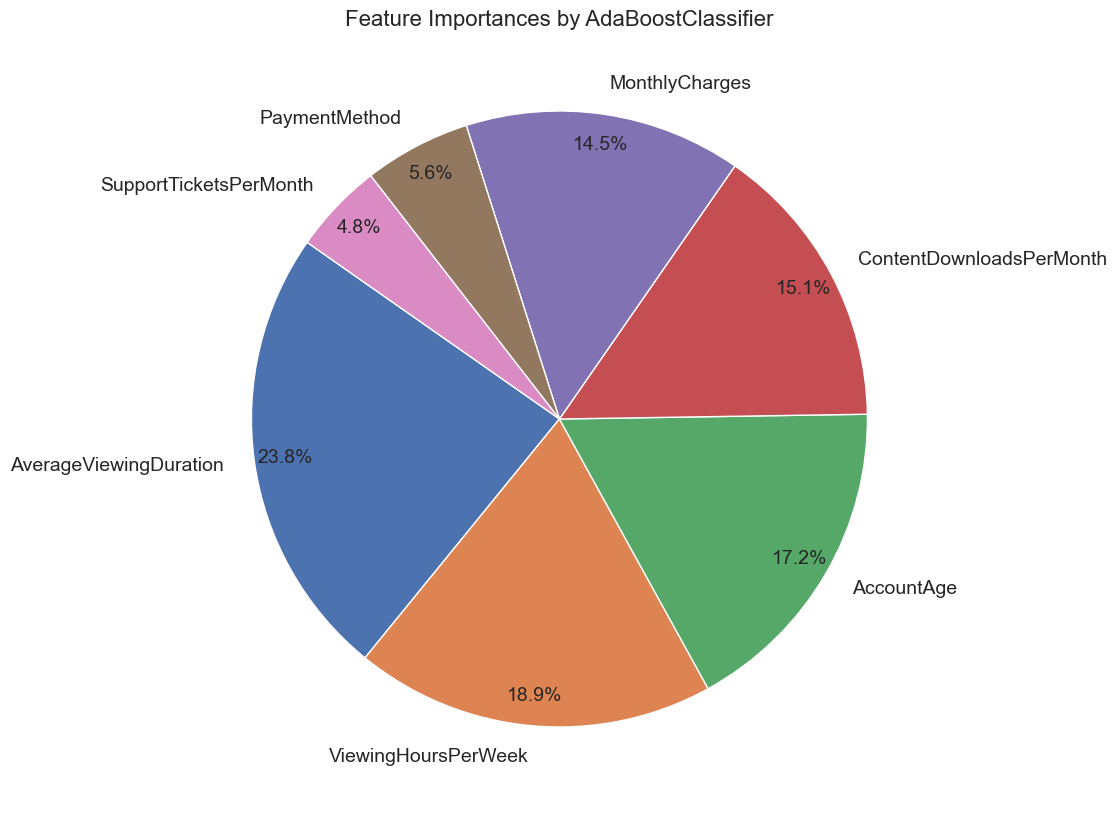

In [108]:
plt.figure(figsize=(10, 10))
plt.pie(feature_importance_df['Importance'], labels=feature_importance_df.index, autopct='%1.1f%%',\
    startangle=145, textprops={'fontsize': 14}, pctdistance = 0.9)
plt.title(f'Feature Importances by {AB.__class__.__name__}', fontsize=16)
plt.show()

In [109]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
balanced_accuracy = balanced_accuracy_score(y_test, y_hat)

# Append metrics to the DataFrame
new_metrics = pd.DataFrame({
    'Model': [type(AB).__name__],
    'precision_score': [precision],
    'recall_score': [recall],
    'f1_score': [f1],
    'Balanced accuracy': [balanced_accuracy]
})

metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# Append best_model to the modeling DataFrame
new_modeling = pd.DataFrame({'Model': [AB]})
modeling = pd.concat([modeling, new_modeling], ignore_index=True)

/Users/shinle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

/Users/shinle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



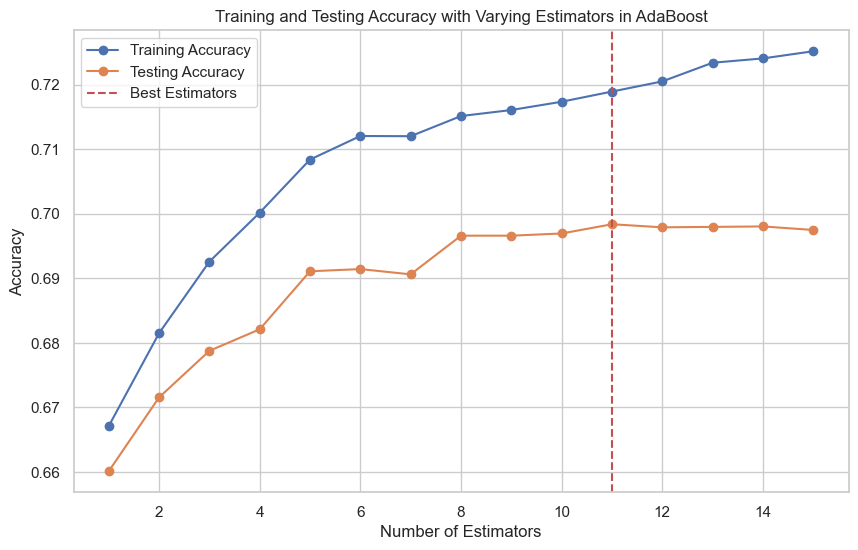

In [110]:

# Get the staged predictions on the training and testing sets
train_predictions = [accuracy_score(y_train, y_hat) for y_hat in AB.staged_predict(X_train[best_features])]
test_predictions = [accuracy_score(y_test, y_hat) for y_hat in AB.staged_predict(X_test[best_features])]

# Get the best number of estimators based on the highest test accuracy
best_n_estimators = np.argmax(test_predictions) + 1

# Plot training and testing performance
plt.figure(figsize=(10, 6))
plt.plot(range(1, AB.n_estimators + 1), train_predictions, label='Training Accuracy', marker='o')
plt.plot(range(1, AB.n_estimators + 1), test_predictions, label='Testing Accuracy', marker='o')
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label='Best Estimators')

plt.title('Training and Testing Accuracy with Varying Estimators in AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


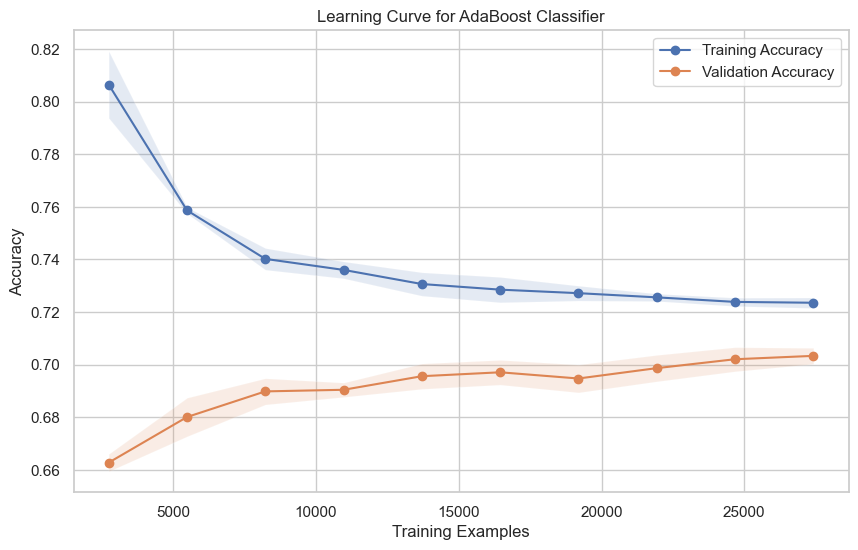

In [111]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    AB, X_train[best_features], y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)  # Use 10 different training set sizes
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)

plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)

plt.title('Learning Curve for AdaBoost Classifier')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.71      0.67      0.69      7342
           1       0.69      0.72      0.70      7345

    accuracy                           0.70     14687
   macro avg       0.70      0.70      0.70     14687
weighted avg       0.70      0.70      0.70     14687



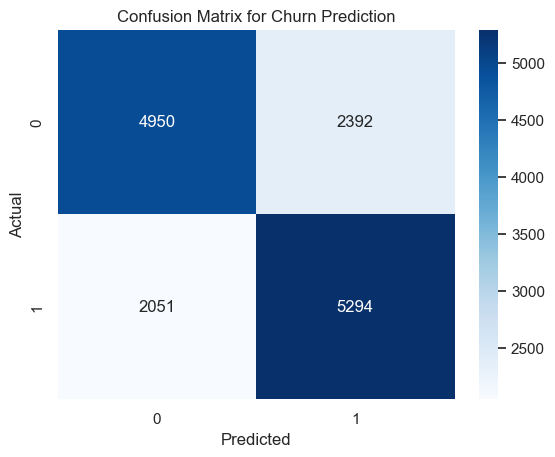

In [112]:
display_confusion_matrix(y_test,y_hat)

<a id="738"></a>
####  <h3 style="color: red;"><b>7.3.8. Model Comparison</b></h3>

In [113]:
metrics_df_copy=metrics_df.copy()

In [114]:

metrics_df_copy.set_index('Model', inplace=True)

In [115]:
'''selected_columns = metrics_df[['f1_score', 'Balanced accuracy']]
selected_columns'''

"selected_columns = metrics_df[['f1_score', 'Balanced accuracy']]\nselected_columns"

<Figure size 1500x1000 with 0 Axes>

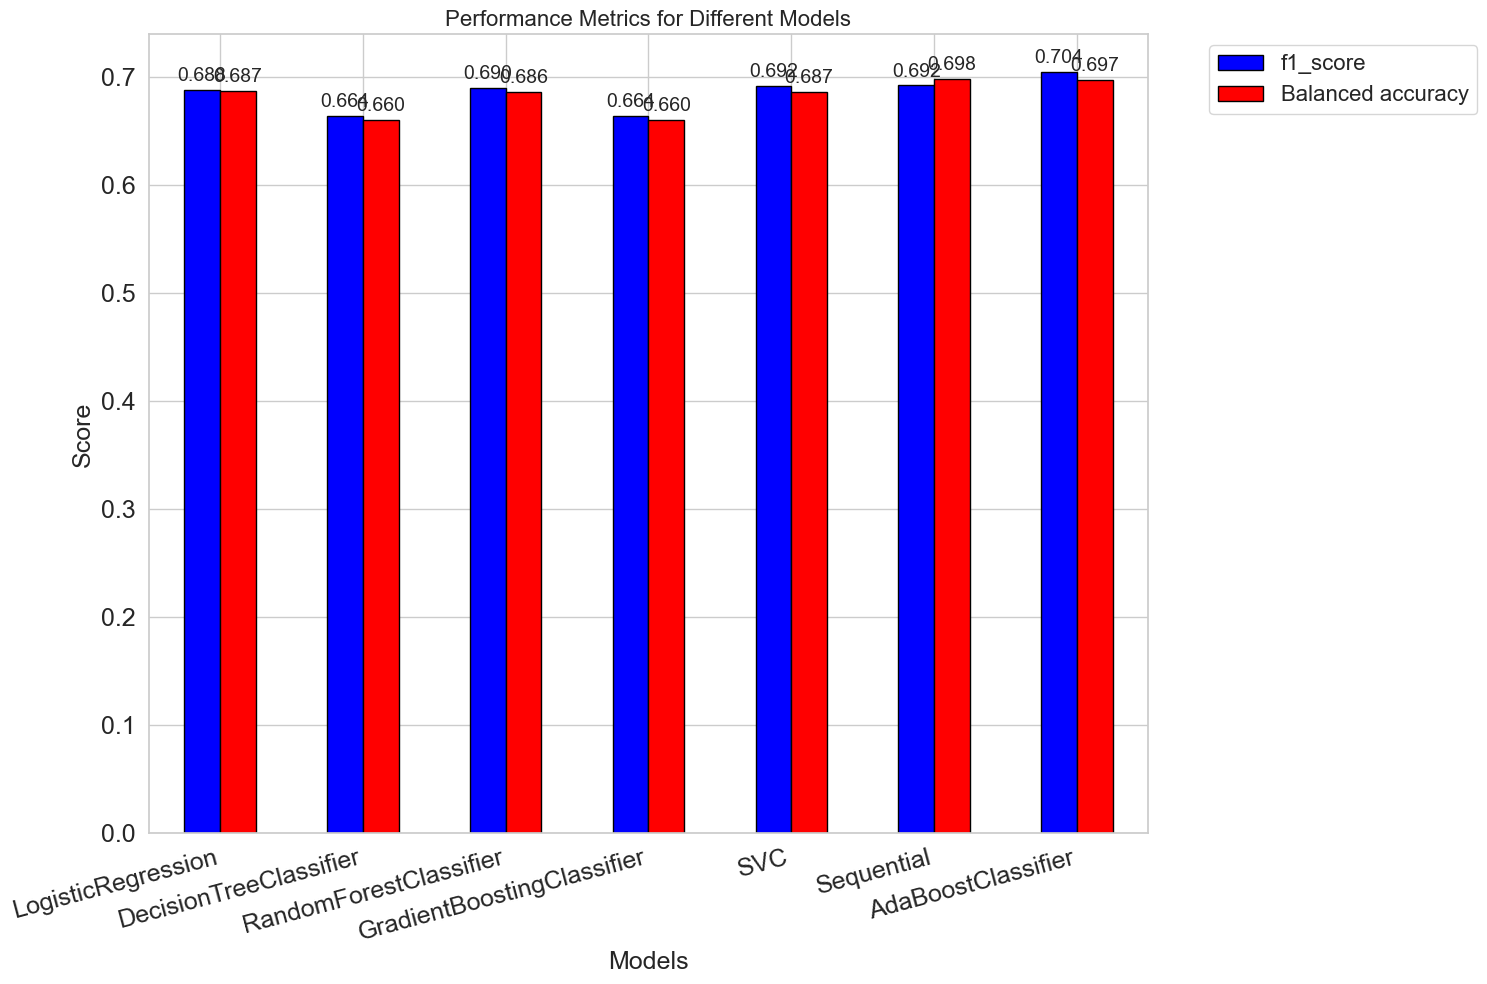

In [116]:
# Plotting
plt.figure(figsize=(15, 10))

# Bar plot for precision, recall, F1, and balanced accuracy
ax = metrics_df_copy[['f1_score','Balanced accuracy' ]].plot(kind='bar', colormap='bwr', edgecolor='black', figsize=(15, 10))

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.xticks(rotation=15, ha='right', fontsize=18)  # Adjust fontsize as needed
plt.yticks(fontsize=18)  # Adjust fontsize as needed
plt.title('Performance Metrics for Different Models', fontsize=16)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [117]:
metrics_df

,Model,precision_score,recall_score,f1_score,Balanced accuracy
0,LogisticRegression,0.685819,0.690674,0.688238,0.687069
1,DecisionTreeClassifier,0.656762,0.671069,0.663838,0.660105
2,RandomForestClassifier,0.682157,0.697481,0.689734,0.686183
3,GradientBoostingClassifier,0.656762,0.671069,0.663838,0.660105
4,SVC,0.680865,0.702927,0.691720,0.686658
5,Sequential,0.706332,0.678829,0.692308,0.698241
6,AdaBoostClassifier,0.688785,0.720762,0.704411,0.697483


In [118]:
max_index = metrics_df['f1_score'].idxmax()
print("Index with maximum f1_score:", max_index)


Index with maximum f1_score: 6


In [119]:
best_model=modeling.at[max_index, 'Model']
print("The best model is: ",best_model.__class__.__name__)

The best model is:  AdaBoostClassifier


Since the best model is Random Forest Classifier, we can show the feature importance to see how the features significantly contribute to our churn prediction

In [120]:
'''plt.figure(figsize=(10, 10))
plt.pie(sorted_feature_imp['importance'], labels=sorted_feature_imp.index, autopct='%1.1f%%',\
    startangle=145, textprops={'fontsize': 14}, pctdistance = 0.9)
plt.title(f'Feature Importances by {best_model.__class__.__name__}', fontsize=16)
plt.show()'''


"plt.figure(figsize=(10, 10))\nplt.pie(sorted_feature_imp['importance'], labels=sorted_feature_imp.index, autopct='%1.1f%%',    startangle=145, textprops={'fontsize': 14}, pctdistance = 0.9)\nplt.title(f'Feature Importances by {best_model.__class__.__name__}', fontsize=16)\nplt.show()"

In [121]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
print(f"Elapsed time: {elapsed_time/60} minutes")

Elapsed time: 3250.9686980247498 seconds
Elapsed time: 54.18281163374583 minutes
